<a href="https://colab.research.google.com/github/gustacoutinho/DataAnalysis-EnergyAndPIB/blob/main/Pergunta_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2: Qual a variação do consumo de energia primária sobre o crescimento da população entre os anos de 2010 a 2020?


In [1]:
!pip install xlrd==1.2.0
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Mounted at /content/drive/


In [2]:
# Importação das Bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [3]:
sns.set(rc={'figure.figsize':(20,10)})

In [4]:
#Função retorna variação do crescimento populacional
def variacaoDoCrescimentoPop(df):
  return df['population'].diff()

#Função para filtrar o dataframe pelo país desejado
def filtraCountrydf(country):
  df_mask_energy = df_energy['country'] == country
  filtered_df = df_energy[df_mask_energy]
  return filtered_df

#Função de tratamento da energia primaria do dataframe para corresponder com a pergunta
def trataPrimaryEnergy(df):
  for index, row in df.iterrows():
      pe = str(row['primary_energy_consumption'])
      pe = pe + '0'
      pei = pe.replace('.', '')
      pei = int(pei)
      df.at[index,'primary_energy_consumption'] = pei
        
  return df

#Leitura csv e selecionamento de dados
df_energy = pd.read_csv("drive/MyDrive/Trab/energy.csv", sep=';')
df_energy = df_energy[['country', 'population', 'year', 'primary_energy_consumption' ]]
df_energy['population'] = variacaoDoCrescimentoPop(df_energy)
df_energy = df_energy.drop(df_energy[df_energy.year < 2010].index)
df_energy = df_energy.drop(df_energy[df_energy.year > 2020].index)

filtered_df = filtraCountrydf('Brazil')
df_energy_final = trataPrimaryEnergy(filtered_df)
df_energy_final = df_energy_final.set_index('year')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,7,8,9,12,13,16,17,20,22,32,33,34,35,38,54,56,66,72,74,80,84,89,91,95,96,97,100,103,109,118,119,120,122,125,126,127) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


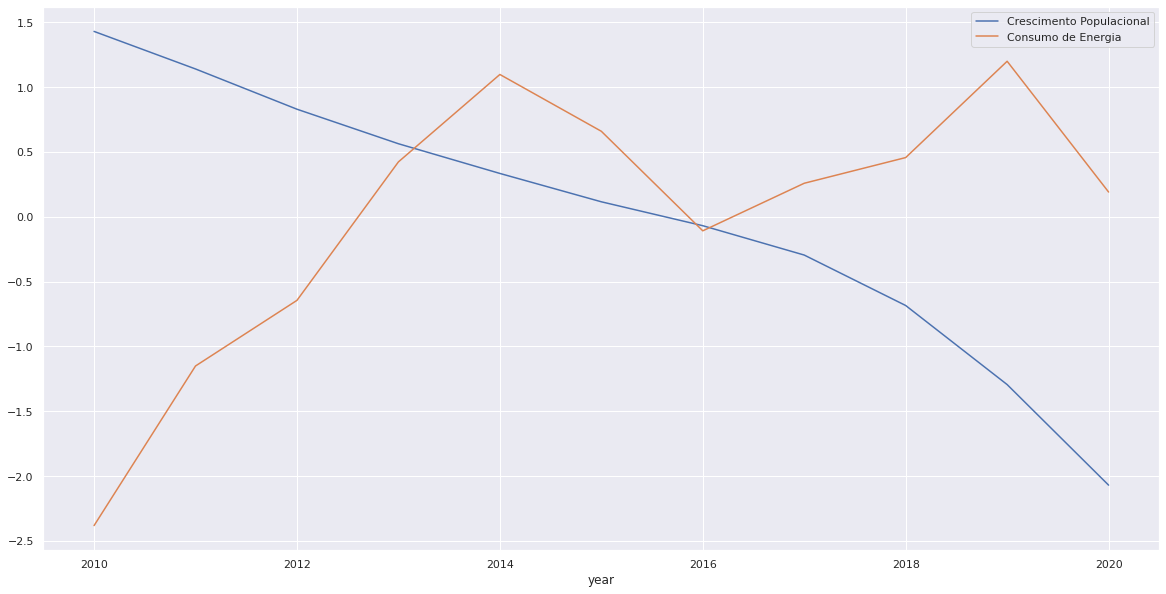

In [5]:
#Função de inserção de ano no dataframe
def insereAno(df):
    for index, row in df.iterrows():
      df.at[index, 'year'] = str(2010 + index)
    return df

#Normalização e exibição do grafico
X = df_energy_final.drop(['country'], axis=1)
scaler = preprocessing.StandardScaler()
normalized_energy = scaler.fit_transform(X)
df = pd.DataFrame(normalized_energy)
df = df.rename(columns={0: "Crescimento Populacional", 1: "Consumo de Energia"}, errors="raise")
df = insereAno(df)
df = df.set_index('year')
df.plot()

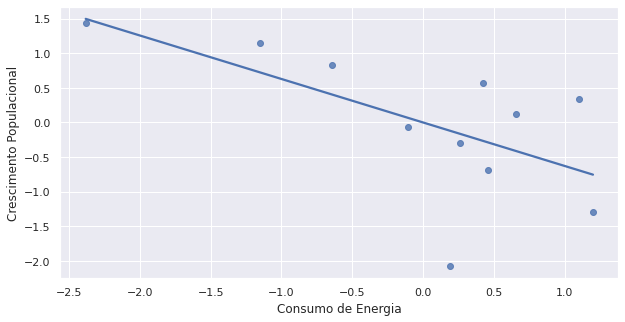

In [6]:
#Correlação de Pearson Graficamente
import seaborn as sb
sns.set(rc={'figure.figsize':(10,5)}) 
sb.regplot(x = "Consumo de Energia", 
            y = "Crescimento Populacional",  
            ci = None, 
            data = df)

In [7]:
#Realiza a Correlação de Pearson utilizando o método pandas.DataFrame.corr
print("Correlação de Pearson: \n")
df.corr(method ='pearson')

Correlação de Pearson: 



,Crescimento Populacional,Consumo de Energia
Crescimento Populacional,1.000000,-0.627564
Consumo de Energia,-0.627564,1.000000
